# Monte Carlo Simulation
Making a function that simulates grocery store sales

# Average grocery visit cost and number of visitors 
    
According to: https://www.foxbusiness.com/lifestyle/what-is-the-average-grocery-bill-for-one-person
The average grocery monthly bill is between 165 and 345 the average person going twice a month so we will divide 255 by 2 so 127$ will be the average visit cost.

According to: https://www.quora.com/What-is-the-average-foot-traffic-at-a-local-grocery-store
Even small stores get 2000 visitors a day we will be a slightly bigger store at 4000 per day average
 


In [36]:
import numpy as np
import pandas as pd
import random

# Simulate average visitors per day, avg margin per day and average amount spend per day per person
This assumes that each day people will buy a varying amount and types of products leading to various margins

In [37]:
#Simulate normal distribution of visitors with average amount of visitors is 4000 transactions per day
avg_customer = 4000 
std_dev = avg_customer * .10 # 10% standard deviation of average visitor amount for simplicity
num_days = 365


# Get variables needed to calculate the random margin
avg_margin = .0275 
std_dev_m = avg_margin * .10 # 10% standard deviation of average visitor amount for simplicity
num_dayz = 365

# Get random distribution for amount the average customer spends each day.
avg_spend = 127.5 
std_dev_s = avg_spend * .10 # 10% standard deviation of average visitor amount for simplicity
num_dayz2 = 365

In [38]:
# Simulating random number of visitors for a whole year.....
visitors = np.random.normal(avg_customer, std_dev, num_days).round(2)
margin = np.random.normal(avg_margin, std_dev_m, num_dayz)
spend = np.random.normal(avg_spend, std_dev_s, num_dayz2)

# Calculate Revenue 

In [39]:
df = pd.DataFrame(index=range(num_days), data={'num_visitors': visitors,
                                               'margin': margin,
                                               'spent': spend})

In [40]:
# Calculate the revenue, total proft and expenses 1- profit
df['revenue'] = df['num_visitors'] * df['spent'] # Calculate the total revenue
df['expenses'] = df['revenue'] * (1- df['margin']) # Calculate the cost of buying product
df['profit'] = df['revenue'] * df['margin'] # Calculate the profit
df.head()

,num_visitors,margin,spent,revenue,expenses,profit
0,4092.74,0.026492,124.474922,509443.491047,495947.484867,13496.006180
1,3737.94,0.030677,145.083381,542312.973328,525676.215643,16636.757685
2,4007.44,0.027556,115.212591,461707.545624,448984.612936,12722.932688
3,4432.08,0.029647,115.781806,513154.226698,497940.706505,15213.520193
4,4160.89,0.024985,113.309969,471470.316393,459690.641583,11779.674809


# SIMULATION NOW 

In [144]:
#Simulate normal distribution of visitors with average amount of visitors is 4000 transactions per day
avg_customer = 4000 
std_dev = avg_customer * .10 # 10% standard deviation of average visitor amount for simplicity
num_days = 365

# Get variables needed to calculate the random margin
avg_margin = .0275 
std_dev_m = avg_margin * .10 # 10% standard deviation of average visitor amount for simplicity

# Get random distribution for amount the average customer spends each day.
avg_spend = 127.5 
std_dev_s = avg_spend * .10 # 10% standard deviation of average visitor amount for simplicity

# Num_days * 2 is the number of days (number of rows we simulate grocery activity)

In [145]:
# Change this variable to decide number of rows(or days)
num_days = 365 # This number will get multiplied by 2 to simulate number of rows
# This will simulate 2 years or 365 *2

In [152]:
# df2 is empty dataframe to hold data
df2= pd.DataFrame([])
# list to keep all the results from each simulation 
profit_total = []

# Loop through many simulations
for i in range(num_simulations):
    # Simulating random visitors, average margin and spend per day for the store
    visitors = np.random.normal(avg_customer, std_dev, num_days).round(2)
margin = np.random.normal(avg_margin, std_dev_m, num_days)
spend = np.random.normal(avg_spend, std_dev_s, num_days)

df = pd.DataFrame(index=range(num_days), data={'num_visitors': visitors,
                                               'margin': margin,
                                               'spent': spend})
    
    # Calculate the revenue, total proft and expenses 1- profit
df['revenue'] = df['num_visitors'] * df['spent'] # Calculate the total revenue
df['expenses'] = df['revenue'] * (1- df['margin']) # Calculate the cost of buying product
df['profit'] = df['revenue'] * df['margin'] # Calculate the profit

df2 = df.append(df) # append a second way..........................

  # We want to track the total revenue expenses and profit
profit_total.append([df['revenue'].sum().round(0),
                      df['expenses'].sum().round(0),
                      df['profit'].sum().round(0)])

In [153]:
df2.describe()
df2.shape

(730, 6)

Text(0, 0.5, 'Frequency')

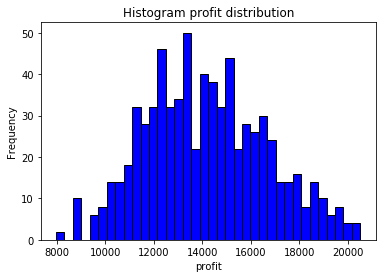

In [154]:
# matplotlib histogram
import matplotlib.pyplot as plt
plt.hist(df2['profit'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
# Add labels
plt.title('Histogram profit distribution')
plt.xlabel('profit')
plt.ylabel('Frequency')